# MERTON CREDIT MODEL

Check the method for generating correlation Gaussian random numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from financepy.models.merton_firm import *
from financepy.models.merton_firm_mkt import *

## Merton Credit Model Market

This is a version of the Merton Credit Model that takes as input the equity value and volatility.

Agrees with results at https://fr.mathworks.com/help/risk/mertonmodel.html

In [6]:
equity_value = [2.6406, 2.6817, 3.977, 2.947, 2.528]
equity_vol = [0.7103, 0.3929, 0.3121, 0.4595, 0.6181]
bondFace = [4.0, 3.5, 3.5, 3.2, 4.0]
risk_free_rate = [0.05, 0.05, 0.05, 0.05, 0.05]
assetGrowthRate = [0.0306, 0.03, 0.031, 0.0302, 0.0305]
timeToMaturity = 1.0 #np.linspace(0.1, 10, 100)

In [8]:
model = MertonFirmMkt(equity_value, bondFace, timeToMaturity, risk_free_rate, assetGrowthRate, equity_vol)

In [9]:
model

OBJECT TYPE: MertonFirmMkt
EQUITY VALUE: [2.6406 2.6817 3.977  2.947  2.528 ]
BOND FACE: [4.  3.5 3.5 3.2 4. ]
YEARS TO MATURITY: [1.]
ASSET GROWTH: [0.0306 0.03   0.031  0.0302 0.0305]
EQUITY VOLATILITY: [0.7103 0.3929 0.3121 0.4595 0.6181]

In [10]:
model.credit_spread()

array([6.46892742e-03, 2.28875552e-05, 9.30381978e-08, 1.23981005e-04,
       2.57202875e-03])

In [11]:
model.leverage()

array([1.60524574, 1.71740768, 2.08751505, 1.87204906, 1.58078595])

In [12]:
model

OBJECT TYPE: MertonFirmMkt
EQUITY VALUE: [2.6406 2.6817 3.977  2.947  2.528 ]
BOND FACE: [4.  3.5 3.5 3.2 4. ]
YEARS TO MATURITY: [1.]
ASSET GROWTH: [0.0306 0.03   0.031  0.0302 0.0305]
EQUITY VOLATILITY: [0.7103 0.3929 0.3121 0.4595 0.6181]

In [13]:
model.prob_default()

array([6.37907587e-02, 7.67718957e-04, 4.71700046e-06, 2.62226986e-03,
       3.44082691e-02])

In [14]:
model.debt_value()

array([3.7803834 , 3.32922679, 3.32930268, 3.04355679, 3.79514391])

In [15]:
model.dist_default()

array([1.52370861, 3.16790101, 4.42975544, 2.79161697, 1.81962233])

## Merton's Basic Model - Credit Spread Term Structure

In [16]:
assetVol = 0.20
bondFace = 100.0
risk_free_rate = 0.05
assetGrowthRate = 0.05
timeToMaturity = np.linspace(0.01,10.,1000)

In [17]:
model1 = MertonFirm(140.0, bondFace, timeToMaturity, risk_free_rate, assetGrowthRate, assetVol)
model2 = MertonFirm(115.0, bondFace, timeToMaturity, risk_free_rate, assetGrowthRate, assetVol)
model3 = MertonFirm(105.0, bondFace, timeToMaturity, risk_free_rate, assetGrowthRate, assetVol)

In [18]:
spd1 = model1.credit_spread() * 10000
spd2 = model2.credit_spread() * 10000
spd3 = model3.credit_spread() * 10000

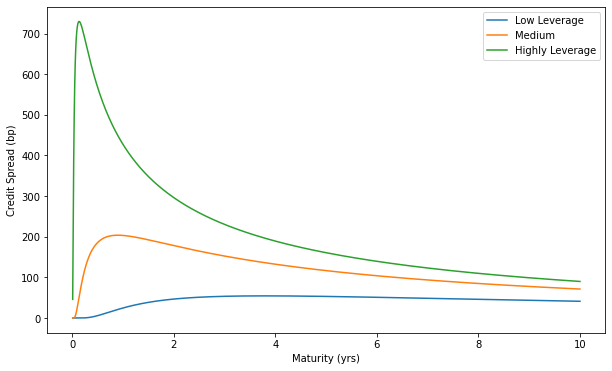

In [19]:
plt.figure(figsize=(10,6))
plt.plot(timeToMaturity, spd1, label="Low Leverage")
plt.plot(timeToMaturity, spd2, label="Medium")
plt.plot(timeToMaturity, spd3, label="Highly Leverage")
plt.xlabel("Maturity (yrs)")
plt.ylabel("Credit Spread (bp)")
plt.legend();

Copyright (c) 2020 Dominic O'Kane